In [111]:
import numpy as np
from tensorflow import keras
from keras import backend as K
import tensorflow as tf
import matplotlib.pyplot as plt

In [415]:
def gaussian_filter(kernel_size, muu=0, sigma=1, dtype=tf.float32):
    # Initializing value of x,y as grid of kernel size
    # in the range of kernel size
    x, y = np.meshgrid(np.linspace(-1, 1, kernel_size),
                       np.linspace(-1, 1, kernel_size))
    dst = np.sqrt(x**2 + y**2)
    #print(dst)

    # lower normal part of gaussian
    normal = 1 / (2.0 * np.pi * sigma**2)

    # Calculating Gaussian filter
    gauss = np.exp(-((dst - muu)**2 / (2.0 * sigma**2))) * normal
    return gauss

In [416]:
class GaussianInitializer(tf.keras.initializers.Initializer):
    def __init__(self, kernel_size=3, mu=0, sig=1):
        self.mu = mu
        self.sig = sig
        self.kernel_size = kernel_size

    def __call__(self, shape, dtype=tf.float32):
        w, h, b, c = shape
        return tf.Variable(gaussian_filter(self.kernel_size, self.mu, self.sig).reshape(self.kernel_size,
                                                                                        self.kernel_size,
                                                                                        b,
                                                                                        c), 
                           dtype=dtype
                          )

    def get_config(self):  # To support serialization
        return {'mean': self.mean, 'sigma': self.sigma}

In [417]:
GaussianInitializer(3)((10, 10, 1, 1), tf.float32)

<tf.Variable 'Variable:0' shape=(3, 3, 1, 1) dtype=float32, numpy=
array([[[[0.05854983]],

        [[0.09653235]],

        [[0.05854983]]],


       [[[0.09653235]],

        [[0.15915494]],

        [[0.09653235]]],


       [[[0.05854983]],

        [[0.09653235]],

        [[0.05854983]]]], dtype=float32)>

In [437]:
w, h = 20, 20
kernel_size = 3
filters = 1
p_0 = 0.95
probs = [0.95, 1 - p_0]
binary_labels_image = np.random.choice([0, 1], 
                                       size=w*h, 
                                       replace=True, 
                                       p=probs).reshape(1, w, h, filters).astype(float)
binary_labels_image.shape

(1, 20, 20, 1)

In [438]:
#binary_labels_image = np.zeros((1, w, h, filters))
#binary_labels_image[0, 0, 0, 0] = 1

In [439]:
kernel_size = 3
filters = 1
initializer = GaussianInitializer(kernel_size)
conv = keras.layers.Conv2D(filters, kernel_size, kernel_initializer=initializer)
conv(binary_labels_image)

<tf.Tensor: shape=(1, 18, 18, 1), dtype=float32, numpy=
array([[[[0.15508218],
         [0.09653235],
         [0.05854983],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.05854983],
         [0.09653235],
         [0.05854983],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.15508218],
         [0.15915494],
         [0.09653235],
         [0.        ],
         [0.        ],
         [0.05854983],
         [0.09653235],
         [0.05854983],
         [0.        ],
         [0.09653235],
         [0.15915494],
         [0.09653235],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.05854983],
         [0.09653235],
         [0.05854983],
         [0.        ],
         [0.        

(18, 18)


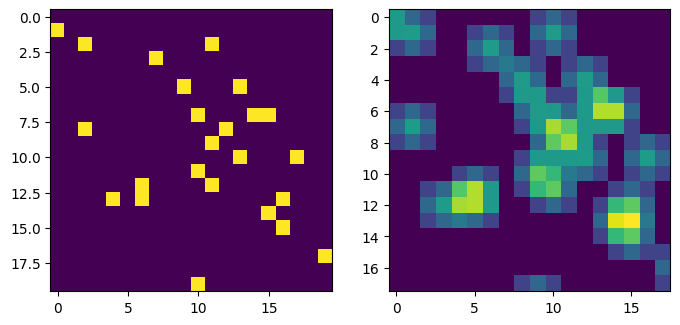

In [440]:
conv_binary_labels_image = conv(binary_labels_image).numpy().squeeze()
print(conv_binary_labels_image.shape)

fig, axes = plt.subplots(1, 2, figsize=(8, 10))
axes[0].imshow(binary_labels_image.reshape(w, h))
axes[1].imshow(conv_binary_labels_image)

Let's allocate and process a bigger image

In [411]:
w, h = 512, 512

filters = 1
kernel_size = 9

p_0 = 0.99
probs = [p_0, 1 - p_0]
bigger_binary_image = np.random.choice([0, 1], 
                                       size=w*h, 
                                       replace=True, 
                                       p=probs).reshape(1, w, h, filters).astype(float)
bigger_binary_image.shape

(1, 512, 512, 1)

In [412]:
initializer = GaussianInitializer(kernel_size)
gaussian_conv = keras.layers.Conv2D(filters, kernel_size, kernel_initializer=initializer)
conv(binary_labels_image)

<tf.Tensor: shape=(1, 18, 18, 1), dtype=float32, numpy=
array([[[[0.05854983],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        

(504, 504)


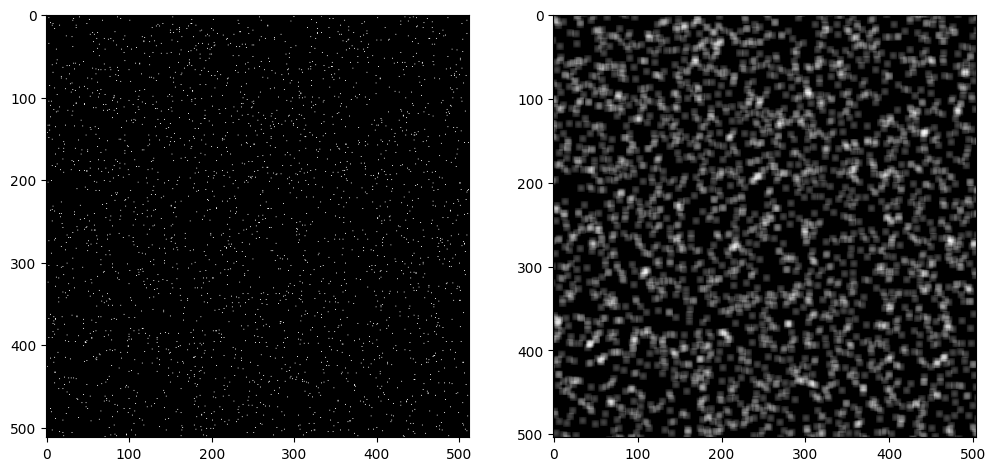

In [413]:
conv_binary_labels_image = gaussian_conv(bigger_binary_image).numpy().squeeze()
print(conv_binary_labels_image.shape)

fig, axes = plt.subplots(1, 2, figsize=(12, 12))

cmap = "Greys_r"
axes[0].imshow(bigger_binary_image.reshape(w, h), cmap=cmap)
axes[1].imshow(conv_binary_labels_image, cmap=cmap)